In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lessson 1

In [2]:
pd.read_csv

<function pandas.io.parsers.read_csv(filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap], sep=<object object at 0x00000237C0054240>, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory

In [3]:
btc_market = pd.read_csv('data/1/btc-market-price.csv', header=None, names=['Timestamp', 'Price'],  date_parser=['Timestamp'],
                         index_col=None, na_values=['?', '-'], dtype={'Price':np.float16})

In [4]:
btc_market['Timestamp'] = pd.to_datetime(btc_market['Timestamp'])
btc_market.set_index('Timestamp')
btc_market = btc_market.dropna()

In [5]:
pd.to_datetime

<function pandas.core.tools.datetimes.to_datetime(arg: Union[~DatetimeScalar, List, Tuple, ~ArrayLike, ForwardRef('Series')], errors: str = 'raise', dayfirst: bool = False, yearfirst: bool = False, utc: Union[bool, NoneType] = None, format: Union[str, NoneType] = None, exact: bool = True, unit: Union[str, NoneType] = None, infer_datetime_format: bool = False, origin='unix', cache: bool = True) -> Union[pandas.core.indexes.datetimes.DatetimeIndex, ForwardRef('Series'), ~DatetimeScalar, ForwardRef('NaTType')]>

In [6]:
btc_market['Timestamp'].unique()
btc_market['Price'].unique()

array([ 1099.,  1142.,  1133.,  1181.,  1209.,  1208.,  1227.,  1219.,
        1180.,  1185.,  1187.,  1216.,  1218.,  1242.,  1258.,  1261.,
        1263.,  1279.,  1309.,  1345.,  1331.,  1335.,  1417.,  1452.,
        1508.,  1533.,  1560.,  1536.,  1641.,  1721.,  1763.,  1821.,
        1720.,  1772.,  1776.,  1723.,  1739.,  1807.,  1899.,  1962.,
        2052.,  2047.,  2090.,  2288.,  2380.,  2388.,  2212.,  2014.,
        2192.,  2276.,  2240.,  2286.,  2400.,  2446.,  2526.,  2516.,
        2698.,  2884.,  2664.,  2792.,  2828.,  2846.,  2962.,  2658.,
        2748.,  2448.,  2442.,  2464.,  2666.,  2508.,  2618.,  2754.,
        2672.,  2728.,  2710.,  2590.,  2512.,  2436.,  2518.,  2586.,
        2544.,  2478.,  2434.,  2502.,  2562.,  2600.,  2620.,  2610.,
        2536.,  2366.,  2370.,  2386.,  2354.,  2190.,  2058.,  1931.,
        2176.,  2320.,  2264.,  2898.,  2682.,  2808.,  2726.,  2752.,
        2560.,  2496.,  2648.,  2782.,  2722.,  2746.,  2866.,  2694.,
      

In [7]:
btc_market.head(50)

,Timestamp,Price
0,2017-02-04,1099.0
1,2017-03-04,1142.0
3,2017-05-04,1133.0
6,2017-08-04,1181.0
7,2017-09-04,1209.0
8,2017-10-04,1208.0
9,2017-11-04,1227.0
10,2017-12-04,1219.0
11,2017-04-13,1180.0
12,2017-04-14,1185.0


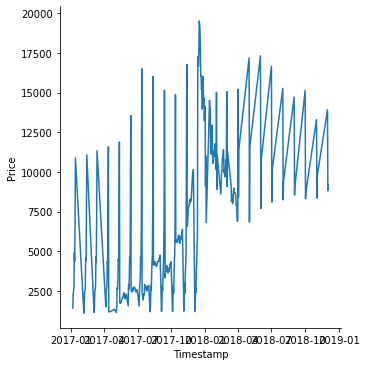

In [8]:
# fmri = sns.load_dataset("btc_market")
sns.relplot(x="Timestamp", y="Price", kind="line", data=btc_market, ci='sd',markers=True);

In [9]:
sns.relplot

<function seaborn.relational.relplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, units=None, **kwargs)>

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

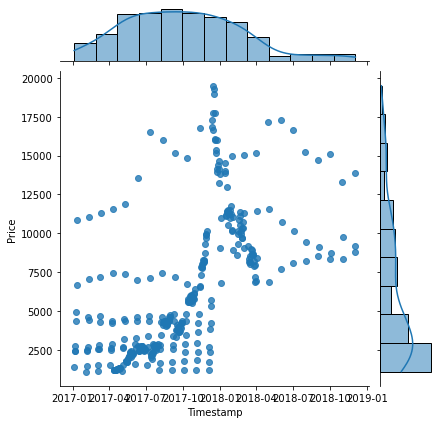

In [10]:
sns.jointplot(x="Timestamp", y="Price", data=btc_market, kind="reg")

In [ ]:
sns.kdeplot

In [ ]:
sns.kdeplot(data=btc_market, x="Timestamp", y='Price', multiple="stack")

In [ ]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.figure.autofmt_xdate()

In [ ]:
exam_file = pd.read_csv('data/1/exam_review.csv', header=[0] ,delimiter='>',)
exam_file['username'] = exam_file['first_name'] + ' '+ exam_file['last_name']
exam_file.set_index('username', inplace=True)
print(exam_file.size)
exam_file['math_score']= exam_file['math_score'].str.replace(',','.')
exam_file['math_score'] = pd.to_numeric(exam_file['math_score']).astype(np.int8)
exam_file['french_score']= exam_file['french_score'].str.replace(',','.')
exam_file['french_score'] = pd.to_numeric(exam_file['french_score']).astype(np.int8)
exam_file['age'] = exam_file['age'].astype(np.int8)
# exam_file['math_score'] = exam_file.loc[exam_file['math_score'] <= 100]
print(exam_file.size)
exam_file

In [ ]:
exam_file.info()

In [ ]:
exam_file.isnull().value_counts()

In [ ]:
exam_df = pd.read_csv('data/1/exam_review.csv',
                      sep='>',
                      decimal=',')
exam_df

In [ ]:
btc_market.to_csv('Result_btc_market.csv')

In [ ]:
exam_file.to_csv('Result_exam_file.csv')